### <font style="color:purple">Download the Dataset</font> 

**[Download the Vehicle registration plate](https://www.dropbox.com/s/k81ljpmzy3fgtx9/Dataset.zip?dl=1)**


Download the Vehicle Registration Plate dataset from [here](https://www.dropbox.com/s/k81ljpmzy3fgtx9/Dataset.zip?dl=1) and unzip it. 

We will have the following directory structure:

```
Dataset
‚îú‚îÄ‚îÄ train
‚îÇ¬†¬† ‚îî‚îÄ‚îÄ Vehicle registration plate
‚îÇ¬†¬†     ‚îî‚îÄ‚îÄ Label
‚îî‚îÄ‚îÄ validation
    ‚îî‚îÄ‚îÄ Vehicle registration plate
        ‚îî‚îÄ‚îÄ Label
```

Unzipping the file will give you a directory `Dataset`. This directory has two folder `train` and `validation`. Each train and validation folder has `Vehicle registration plate`  folder with `.jpg` images and a folder `Labels`.  `Labels` folder has bounding box data for the images.


For example,
For image: `Dataset/train/Vehicle registration plate/bf4689922cdfd532.jpg`
Label file is  `Dataset/train/Vehicle registration plate/Label/bf4689922cdfd532.txt`

There are one or more lines in each `.txt` file. Each line represents one bounding box.
For example,
```
Vehicle registration plate 385.28 445.15 618.24 514.225
Vehicle registration plate 839.68 266.066462 874.24 289.091462
```

We have a single class detection (`Vehicle registration plate detection`) problem. So bounding box details start from the fourth column in each row.

Representation is in `xmin`, `ymin`, `xmax`, and `ymax` format.

**It has `5308` training and `386` validation dataset.**

Data is downloaded from [Open Images Dataset](https://storage.googleapis.com/openimages/web/index.html)

# <font style="color:blue">Project 3: Object Detection</font>


#### Maximum Points: 100

<div>
    <table>
        <tr><td><h3>Sr. no.</h3></td> <td><h3>Section</h3></td> <td><h3>Points</h3></td> </tr>
        <tr><td><h3>1</h3></td> <td><h3>Plot Ground Truth Bounding Boxes</h3></td> <td><h3>20</h3></td> </tr>
        <tr><td><h3>2</h3></td> <td><h3>Training</h3></td> <td><h3>25</h3></td> </tr>
        <tr><td><h3>3</h3></td> <td><h3>Inference</h3></td> <td><h3>15</h3></td> </tr>
        <tr><td><h3>4</h3></td> <td><h3>COCO Detection Evaluation</h3></td> <td><h3>25</h3></td> </tr>
        <tr><td><h3>5</h3></td> <td><h3>Run Inference on a Video</h3></td> <td><h3>15</h3></td> </tr>
    </table>
</div>


#  <font style="color:green">1. Plot Ground Truth Bounding Boxes [20 Points]</font> 

**You have to show three images from validation data with the bounding boxes.**

The plotted images should be similar to the following:

<img src='https://www.learnopencv.com/wp-content/uploads/2020/04/c3-w10-g1.png'>



<img src='https://www.learnopencv.com/wp-content/uploads/2020/04/c3-w10-g2.png'>



<img src='https://www.learnopencv.com/wp-content/uploads/2020/04/c3-w10-g3.png'>



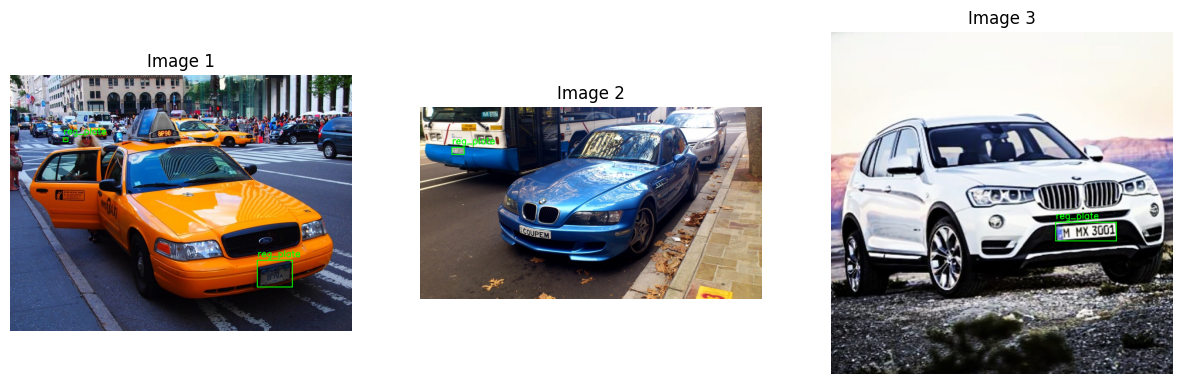

In [2]:
import os
import glob
import cv2
import matplotlib.pyplot as plt

# Function to read and process each label file
def read_label_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        boxes = []
        for line in lines:
            parts = line.strip().split()
            x_min = float(parts[3])
            y_min = float(parts[4])
            x_max = float(parts[5])
            y_max = float(parts[6])
            boxes.append((x_min, y_min, x_max, y_max))
    return boxes

# Function to draw bounding boxes on an image
def draw_bounding_boxes(image_path, boxes):
    image = cv2.imread(image_path)
    label='reg_plate'
    for (x_min, y_min, x_max, y_max) in boxes:
        cv2.rectangle(image, (int(x_min), int(y_min)), (int(x_max), int(y_max)), (0, 255, 0), 2)
        cv2.putText(image, label, (int(x_min), int(y_min) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
    return image

# Paths to the validation directories
validation_dir = '/kaggle/input/object-dectection-num-plate/Dataset/validation/Vehicle registration plate'
label_dir = os.path.join(validation_dir, 'Label')

# Get a list of all image files and their corresponding label files
image_files = glob.glob(os.path.join(validation_dir, '*.jpg'))
label_files = [os.path.join(label_dir, os.path.basename(f).replace('.jpg', '.txt')) for f in image_files]

# Display three images with bounding boxes
plt.figure(figsize=(15, 10))
for i in range(3):
    image_path = image_files[i]
    label_path = label_files[i]
    boxes = read_label_file(label_path)
    image_with_boxes = draw_bounding_boxes(image_path, boxes)
    
    plt.subplot(1, 3, i+1)
    plt.imshow(cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB))
    plt.title(f'Image {i+1}')
    plt.axis('off')

plt.show()


In [3]:
import os
import shutil

def copy_files(src_dir, dst_dir):
    # Create the destination directory if it doesn't exist
    if not os.path.exists(dst_dir):
        os.makedirs(dst_dir)

    # Walk through the source directory
    for root, dirs, files in os.walk(src_dir):
        for dir_name in dirs:
            src_subdir = os.path.join(root, dir_name)
            dst_subdir = os.path.join(dst_dir, dir_name)
            shutil.copytree(src_subdir, dst_subdir)

# Specify your source and destination directories
src_dataset_dir = '/kaggle/input/object-dectection-num-plate/Dataset'  # Replace with your actual dataset path
dst_copy_dir = '/kaggle/working/datatset'  # Replace with your desired copy destination

# Copy the dataset without label folders
copy_files(os.path.join(src_dataset_dir, 'train'), os.path.join(dst_copy_dir, 'train'))
copy_files(os.path.join(src_dataset_dir, 'validation'), os.path.join(dst_copy_dir, 'validation'))

print("Dataset copied")


Dataset copied


In [4]:
import os
import glob
import cv2

# Function to read and process each label file
def read_label_file(file_path, image_width, image_height):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        boxes = []
        for line in lines:
            parts = line.strip().split()
            x_min = float(parts[3])
            y_min = float(parts[4])
            x_max = float(parts[5])
            y_max = float(parts[6])

            x_center = ((x_min + x_max) / 2) / image_width
            y_center = ((y_min + y_max) / 2) / image_height
            width = (x_max - x_min) / image_width
            height = (y_max - y_min) / image_height

            boxes.append(f"0 {x_center} {y_center} {width} {height}")
    return boxes

# Paths to the directories
train_images_dir = '/kaggle/working/datatset/train/Vehicle registration plate'
train_labels_dir = '/kaggle/input/object-dectection-num-plate/Dataset/train/Vehicle registration plate/Label'

# Get a list of all image files and their corresponding label files
image_files = glob.glob(os.path.join(train_images_dir, '*.jpg'))
label_files = [os.path.join(train_labels_dir, os.path.basename(f).replace('.jpg', '.txt')) for f in image_files]

for i in range(len(image_files)):
    image_path = image_files[i]
    label_path = label_files[i]
    
    # Get image dimensions
    image = cv2.imread(image_path)
    image_height, image_width, _ = image.shape

    # Create the output directory if it doesn't exist
    output_dir = "/kaggle/working/datatset/train/Vehicle registration plate"
    os.makedirs(output_dir, exist_ok=True)

    # Create the output label file path
    output_label_path = os.path.join(output_dir, os.path.basename(label_path))
    
    boxes = read_label_file(label_path, image_width, image_height)
    
    with open(output_label_path, 'w') as f:
        for box in boxes:
            f.write(box + '\n')

In [5]:
# Paths to the directories
val_images_dir = '/kaggle/working/datatset/validation/Vehicle registration plate'
val_labels_dir = '/kaggle/input/object-dectection-num-plate/Dataset/validation/Vehicle registration plate/Label'

# Get a list of all image files and their corresponding label files
image_files = glob.glob(os.path.join(val_images_dir, '*.jpg'))
label_files = [os.path.join(val_labels_dir, os.path.basename(f).replace('.jpg', '.txt')) for f in image_files]

for i in range(len(image_files)):
    image_path = image_files[i]
    label_path = label_files[i]
    
    # Get image dimensions
    image = cv2.imread(image_path)
    image_height, image_width, _ = image.shape

    # Create the output directory if it doesn't exist
    output_dir = "/kaggle/working/datatset/validation/Vehicle registration plate"
    os.makedirs(output_dir, exist_ok=True)

    # Create the output label file path
    output_label_path = os.path.join(output_dir, os.path.basename(label_path))
    
    boxes = read_label_file(label_path, image_width, image_height)
    
    with open(output_label_path, 'w') as f:
        for box in boxes:
            
            f.write(box + '\n')

In [6]:
import os
import glob

def read_and_print_labels(folder_path):
  """
  Reads and prints the contents of all label files in the specified folder.

  Args:
    folder_path: The path to the folder containing the label files.
  """
  for filename in glob.glob(os.path.join(folder_path, '*.txt')):
    with open(filename, 'r') as f:
        print(f'Filename: {filename}')
        print(f.read())

# Example usage:
folder_path = '/kaggle/working/datatset/train/Vehicle registration plate'
read_and_print_labels(folder_path)
folder_path = '/kaggle/working/datatset/validation/Vehicle registration plate'
read_and_print_labels(folder_path)

Filename: /kaggle/working/datatset/train/Vehicle registration plate/65abf602c86512ff.txt
0 0.49019599999999997 0.4591505 0.7516339999999999 0.369281

Filename: /kaggle/working/datatset/train/Vehicle registration plate/c9005425919f9618.txt
0 0.5465625 0.5183334999999999 0.504375 0.4883329999999999

Filename: /kaggle/working/datatset/train/Vehicle registration plate/88c1f2d49917585f.txt
0 0.543218 0.3925 0.08510600000000013 0.03300000000000002

Filename: /kaggle/working/datatset/train/Vehicle registration plate/6e7dabe9c191cb6d.txt
0 0.5059375 0.6258330000000001 0.756875 0.53

Filename: /kaggle/working/datatset/train/Vehicle registration plate/8f0ca5d1d769fb4f.txt
0 0.15875 0.36500000000000005 0.03375 0.045000000000000005
0 0.5040625 0.14541649999999998 0.02437499999999998 0.024167000000000032

Filename: /kaggle/working/datatset/train/Vehicle registration plate/e8b2a332787b0bb1.txt
0 0.819375 0.7209190000000001 0.030000000000000027 0.02157599999999989

Filename: /kaggle/working/datatset/

#  <font style="color:green">2. Training [25 Points]</font> 

- **Write your training code in this section.**

- **You also have to share ([shared logs example](https://tensorboard.dev/experiment/JRtnsKbwTaq1ow6nPLPGeg)) the loss plot of your training using tensorboard.dev.** 

How to share TensorBoard logs using tensorboard.dev find [here](https://courses.opencv.org/courses/course-v1:OpenCV+OpenCV-106+2019_T1/courseware/b1c43ffe765246658e537109e188addb/d62572ec8bd344db9aeae81235ede618/4?activate_block_id=block-v1%3AOpenCV%2BOpenCV-106%2B2019_T1%2Btype%40vertical%2Bblock%40398b46ddcd5c465fa52cb4d572ba3229).

In [7]:
if not os.path.exists('yolov5'):
    !git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 16965, done.
remote: Counting objects: 100% (160/160), done.
remote: Compressing objects: 100% (110/110), done.
remote: Total 16965 (delta 81), reused 101 (delta 50), pack-reused 16805 (from 1)
Receiving objects: 100% (16965/16965), 15.71 MiB | 28.46 MiB/s, done.
Resolving deltas: 100% (11619/11619), done.


In [8]:
%cd yolov5/
!pwd
!pip install -r requirements.txt

/kaggle/working/yolov5
/kaggle/working/yolov5
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 881.4/881.4 kB 17.2 MB/s eta 0:00:0000:01


In [9]:
%%writefile data.yaml
path: '/kaggle/working/datatset' # dataset root dir
train: '/kaggle/working/datatset/train/Vehicle registration plate'
val: '/kaggle/working/datatset/validation/Vehicle registration plate'
nc: 1
names: ['reg plate']

Writing data.yaml


In [10]:

!python train.py --data data.yaml --weights yolov5m.pt --img 640 --epochs {30} --batch-size 64

Creating new Ultralytics Settings v0.0.6 file ‚úÖ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
wandb: WARNING ‚ö†Ô∏è wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 
wandb: W&B disabled due to login timeout.
train: weights=yolov5m.pt, cfg=, data=data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=30, batch_size=64, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evol

In [11]:
!python /kaggle/working/yolov5/detect.py --weights /kaggle/working/yolov5/runs/train/exp/weights/best.pt --img 640 --conf 0.5 --source '/kaggle/working/datatset/validation/Vehicle registration plate' --save-txt --save-conf 

detect: weights=['/kaggle/working/yolov5/runs/train/exp/weights/best.pt'], source=/kaggle/working/datatset/validation/Vehicle registration plate, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 üöÄ v7.0-369-g907bef2f Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 212 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
image 1/386 /kaggle/working/datatset/validation/Vehicle registration plate/003a5aaf6d17c917.jpg: 448x640 1 reg plate, 47.9ms
image 2/386 /kaggle/working/datatset/validation/Vehicle registration plate/00723dac8201a83e.jpg: 480x640 2 reg plates, 34.3ms
im

In [12]:
!python val.py --data data.yaml --weights /kaggle/working/yolov5/runs/train/exp/weights/best.pt --img 640 --batch-size 32  --save-txt --save-conf --save-json


val: data=data.yaml, weights=['/kaggle/working/yolov5/runs/train/exp/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=True, save_hybrid=False, save_conf=True, save_json=True, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 üöÄ v7.0-369-g907bef2f Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 212 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
val: Scanning /kaggle/working/datatset/validation/Vehicle registration plate.cac
                 Class     Images  Instances          P          R      mAP50   
                   all        386        512      0.932      0.898       0.94      0.666
Speed: 0.2ms pre-process, 12.3ms inference, 1.7ms NMS per image at shape (32, 3, 640, 640)

Evaluating pycocotools mAP... saving runs/val/exp/best_predictions.json...
requirements: Ultralytics requirem

#  <font style="color:green">3. Inference [15 Points]</font> 

**You have to make predictions from your trained model on three images from the validation dataset.**

The plotted images should be similar to the following:

<img src='https://www.learnopencv.com/wp-content/uploads/2020/04/c3-w10-p1.png'>



<img src='https://www.learnopencv.com/wp-content/uploads/2020/04/c3-w10-p2.png'>



<img src='https://www.learnopencv.com/wp-content/uploads/2020/04/c3-w10-p3.png'>




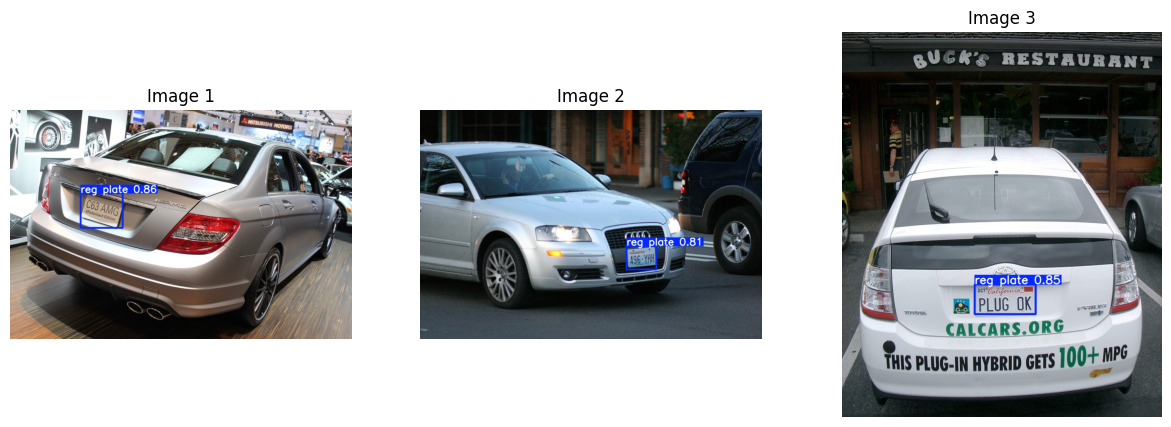

In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# Assuming your predicted images are in the following directory
image_dir = "runs/detect/exp" 

# List of image file names (replace with your actual image names)
image_files = ["003a5aaf6d17c917.jpg", "fa9147596edc058f.jpg", "ff85b09876d61631.jpg"]

# Create a figure and axes
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Iterate through the images and display them
for i, file in enumerate(image_files):
    image_path = os.path.join(image_dir, file)
    img = mpimg.imread(image_path)
    axes[i].imshow(img)
    axes[i].axis('off')  # Hide axes
    axes[i].set_title(f"Image {i+1}")

# Show the plot
plt.show()

#  <font style="color:green">4. COCO Detection Evaluation [25 Points]</font> 

**You have to evaluate your detection model on COCO detection evaluation metric.**

For your reference here is the coco evaluation metric chart:


---

<img src="https://www.learnopencv.com/wp-content/uploads/2020/03/c3-w9-coco_metric.png">

---

#### <font style="color:red">The expected `AP` (primary challenge metric) is more than `0.5`.</font>

**The expected output should look similar to the following:**

```
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.550
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.886
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.629
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.256
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.653
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.627
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.504
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.629
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.633
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.380
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.722
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.704
```



In [14]:
!pip install pycocotools


In [16]:
from pycocotools.cocoeval import COCOeval
from pycocotools.coco import COCO

In [17]:
import os
import json
from PIL import Image

createCocoLabelFile = True   # Do it only once
if createCocoLabelFile:
    # Paths to the images and labels folders
    images_path = '/kaggle/input/object-dectection-num-plate/Dataset/validation/Vehicle registration plate'
    labels_path = '/kaggle/input/object-dectection-num-plate/Dataset/validation/Vehicle registration plate/Label'  # Labels in special format

    # Initialize the COCO dataset structure
    coco_format = {
        "info": {
            "description": "Vehicle Registration Plates Dataset",
            "version": "1.0",
            "year": 2024,
            "contributor": "",
            "date_created": "2024-08-24"
        },
        "licenses": [],
        "images": [],
        "annotations": [],
        "categories": [
            {
                "id": 1,
                "name": "Vehicle registration plate",
                "supercategory": "object"
            }
        ]
    }

    # Function to create the COCO annotations from bounding box information
    def create_coco_annotation(ann_id, image_id, bbox, category_id=1):
        x_min, y_min, x_max, y_max = bbox
        width = x_max - x_min
        height = y_max - y_min
        area = width * height

        return {
            "id": ann_id,
            "image_id": image_id,
            "category_id": category_id,
            "bbox": [x_min, y_min, width, height],
            "area": area,
            "segmentation": [],
            "iscrowd": 0
        }

    # Process each image and its corresponding label
    image_id = 0
    ann_id = 0
    for image_filename in os.listdir(images_path):
        if image_filename.endswith(('.jpg', '.jpeg', '.png')):
            print(image_filename)
            image_id += 1

            # Read image to get dimensions
            image_path = os.path.join(images_path, image_filename)
            img = Image.open(image_path)
            width, height = img.size

            # Append image info to the COCO structure
            coco_format["images"].append({
                "id": image_id,
                "file_name": image_filename,
                "width": width,
                "height": height
            })

            # Get corresponding label file
            label_filename = os.path.splitext(image_filename)[0] + '.txt'
            label_path = os.path.join(labels_path, label_filename)

            # Check if the label file exists
            if os.path.exists(label_path):
                with open(label_path, 'r') as f:
                    for line in f:
                        parts = line.strip().split()
                        if len(parts) == 7 and parts[0] == 'Vehicle':
                            # Convert bounding box coordinates to float
                            bbox = list(map(float, parts[3:]))
                            annotation = create_coco_annotation(ann_id, image_id, bbox)
                            coco_format["annotations"].append(annotation)
                            ann_id += 1

    # Save the COCO-format JSON to a file
    with open('/kaggle/working/coco_ground_truth.json', 'w') as json_file:
        json.dump(coco_format, json_file, indent=4)

        print("COCO ground truth JSON file created successfully.")


6504632e0dc25997.jpg
485e5f37dd13ffab.jpg
a67bc3f5f8650c73.jpg
64de505bd2bac82b.jpg
e57d38ae6a921518.jpg
ea02d99ba51372ee.jpg
246a0e4264a39433.jpg
a6e3b0b73220cd32.jpg
fa9147596edc058f.jpg
0170ea8e1a33375a.jpg
bbcac63e32bd8137.jpg
cb8c75fc1c7ccf73.jpg
53ad98b12752ad16.jpg
ef1bd7b718a3f6e8.jpg
f73b754cdb1ab677.jpg
71dbb47ebe504abe.jpg
80e02a518ffe4cb2.jpg
86c92b0402fec141.jpg
e9cd346a4a84d594.jpg
b6e55f97085c3732.jpg
0f0596b1c511e071.jpg
302d636c896c263f.jpg
453a77009b27e253.jpg
7539902687e8f3a4.jpg
4ac941b9393d00f9.jpg
65e080f9ac466664.jpg
aca8821ff0368720.jpg
0801961485534636.jpg
63d3df798bc8840f.jpg
61a69ad713142e45.jpg
16789af24af158d8.jpg
a21aa7c1d7b93d12.jpg
182268e1f8c6525f.jpg
b15d6c0bdf90226d.jpg
11f80fda2c38011c.jpg
5cc19b450a51ee4c.jpg
e9fdd0a41cb61da6.jpg
288a95c01e43cd14.jpg
1545c73bdecb3e2f.jpg
1ca1155083156d72.jpg
091c033b2a7df15b.jpg
e2427db217e5c3db.jpg
bf2f25f3ed9ff4d5.jpg
59b83c5f8f1dcfa4.jpg
e6299b9e04680adb.jpg
1ead26febde18ce9.jpg
8256e277c7f47797.jpg
a3ad91fabd188

In [19]:
def load_coco_image_mapping(gt_annotations_path):
    # Load the COCO ground truth annotations and create a mapping from filenames to image IDs.
    coco_gt = COCO(gt_annotations_path)
    img_filename_to_id = {img['file_name']: img['id'] for img in coco_gt.loadImgs(coco_gt.getImgIds())}
    return img_filename_to_id

def convert_yolo_to_coco(yolo_json_path, img_filename_to_id_map):
    # Convert YOLO predictions to COCO format and replace the image filename with the corresponding image ID.
    with open(yolo_json_path, 'r') as f:
        yolo_predictions = json.load(f)

    coco_predictions = []
    for pred in yolo_predictions:
        img_filename  = str(pred['image_id']) + '.jpg' # directly using image_id as the filename
        if img_filename in img_filename_to_id_map:
            
            img_id = img_filename_to_id_map[img_filename]
            category_id = pred['category_id']+1
            x_min, y_min, width, height = pred['bbox']
        

            coco_pred = {
                "image_id": img_id,
                "category_id": category_id,  # COCO category IDs start at 1, not 0
                "bbox": [x_min, y_min, width, height],
                "score": pred['score']
            }
            coco_predictions.append(coco_pred)

    return coco_predictions

def compute_coco_metrics(gt_annotations_path, pred_annotations):
    # Compute COCO metrics based on ground truth and prediction annotations.
    
    # Load ground truth in COCO format
    coco_gt = COCO(gt_annotations_path)
    
    # Convert predictions to COCO format
    coco_dt = coco_gt.loadRes(pred_annotations)
    
    # Initialize COCO evaluation
    coco_eval = COCOeval(coco_gt, coco_dt, 'bbox')
    
    # Run evaluation
    coco_eval.evaluate()
    coco_eval.accumulate()
    coco_eval.summarize()

    # Extract metrics
    metrics = [
        coco_eval.stats[0],  # AP
        coco_eval.stats[1],  # AP50
        coco_eval.stats[2],  # AP75
        coco_eval.stats[3],  # APs
        coco_eval.stats[4],  # APm
        coco_eval.stats[5],  # APl
        coco_eval.stats[6],  # AR1
        coco_eval.stats[7],  # AR10
        coco_eval.stats[8],  # AR100
        coco_eval.stats[9],  # ARs
        coco_eval.stats[10], # ARm
        coco_eval.stats[11]  # ARl
    ]
    
    return metrics

# Paths to the COCO ground truth annotations and YOLO predictions JSON files
gt_annotations_path = '/kaggle/working/coco_ground_truth.json'  # Created in CreateCocoGtFile.py
yolo_json_path = '/kaggle/working/yolov5/runs/val/exp/best_predictions.json'

# Load mapping from image filenames to COCO Image IDs
img_filename_to_id_map = load_coco_image_mapping(gt_annotations_path)

# Convert YOLO predictions to COCO format
coco_predictions = convert_yolo_to_coco(yolo_json_path, img_filename_to_id_map)

# Save the converted predictions to a new JSON file
pred_annotations_path = 'converted_yolo_predictions.json'
with open(pred_annotations_path, 'w') as f:
    json.dump(coco_predictions, f)

# Check if the JSON file is empty or improperly formatted
if not coco_predictions:
    print("No predictions available for evaluation.")
else:
    print("YOLO predictions are ready for evaluation.")
    # Compute COCO metrics
    metrics = compute_coco_metrics(gt_annotations_path, pred_annotations_path)
    print("COCO Metrics:", metrics)


loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
YOLO predictions are ready for evaluation.
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.39s).
Accumulating evaluation results...
DONE (t=0.10s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.650
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.930
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.748
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.338
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.717
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.751
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.577
 Average Recall    

# <font style="color:green">5. Run Inference on a Video [15 Points]</font>

#### [Download the Input Video](https://www.dropbox.com/s/g88o4dx18zpgn8k/projet3-input-video.mp4?dl=1)

**You have to run inference on a video.** 

You can download the video from [here](https://www.dropbox.com/s/g88o4dx18zpgn8k/projet3-input-video.mp4?dl=1).

#### <font style="color:red">Upload the output video on youtube and share the link. Do not upload the video in the lab.</font>

In [ ]:
https://youtu.be/8MEb1RHeghA

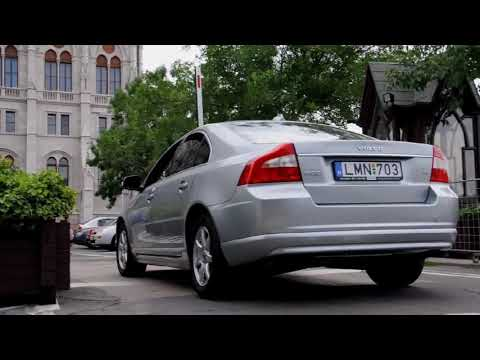

In [21]:
from IPython.display import YouTubeVideo, display
video = YouTubeVideo("18HWHCevFdU", width=640, height=360)
display(video)

**Your output video should have a bounding box around the vehicle registration plate.**

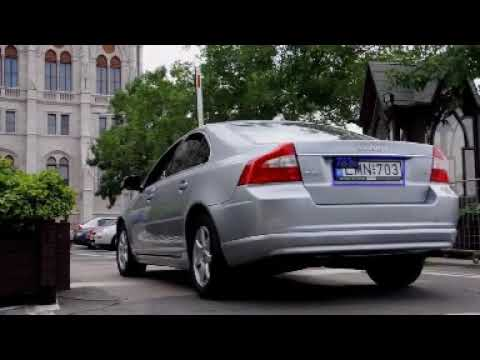

In [22]:
video = YouTubeVideo("5SgCuee7AMs", width=640, height=360)
display(video)

**You can use the following sample code to read and write a video.**

In [24]:
!python detect.py --weights runs/train/exp/weights/best.pt --source '/kaggle/input/input-video'

detect: weights=['runs/train/exp/weights/best.pt'], source=/kaggle/input/input-video, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 üöÄ v7.0-369-g907bef2f Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 212 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
video 1/1 (1/131) /kaggle/input/input-video/projet3-input-video.mp4: 384x640 (no detections), 48.6ms
video 1/1 (2/131) /kaggle/input/input-video/projet3-input-video.mp4: 384x640 (no detections), 19.7ms
video 1/1 (3/131) /kaggle/input/input-video/projet3-input-video.mp4: 384x640 (no detections), 19.6ms
video 1

In [23]:
def video_read_write(video_path):
    """
    Read video frames one-by-one, flip it, and write in the other video.
    video_path (str): path/to/video
    """
    video = cv2.VideoCapture(video_path)
    
    # Check if camera opened successfully
    if not video.isOpened(): 
        print("Error opening video file")
        return
    
    # create video writer
    width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
    frames_per_second = video.get(cv2.CAP_PROP_FPS)
    num_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
    
    output_fname = '{}_out.mp4'.format(os.path.splitext(video_path)[0])
    
    output_file = cv2.VideoWriter(
        filename=output_fname,
        # some installation of opencv may not support x264 (due to its license),
        # you can try other format (e.g. MPEG)
        fourcc = cv2.VideoWriter_fourcc(*'mpeg'),
        
        fps=float(frames_per_second),
        frameSize=(width, height),
        isColor=True,
    )
    
        
    i = 0
    while video.isOpened():
        ret, frame = video.read()
        if ret:
            
            output_file.write(frame[:, ::1, :])
#             cv2.imwrite('anpd_out/frame_{}.png'.format(str(i).zfill(3)), frame[:, ::-1, :])
            i += 1
        else:
            break
        
    video.release()
    output_file.release()
    
    return

In [25]:
video_read_write('/kaggle/working/yolov5/runs/detect/exp2/projet3-input-video.mp4')

OpenCV: FFMPEG: tag 0x6765706d/'mpeg' is not supported with codec id 2 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
